## Importando librerías y data 

### Librerías 

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización e imagenes
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.utils import resample

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Metricas 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, make_scorer, roc_auc_score, classification_report,cohen_kappa_score ,roc_curve,jaccard_similarity_score

# Otros
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Data

Cargamos los datos y renombramos variables con sus nombres originales

In [2]:
data = pd.read_csv('data/data_desafio_seguros')

id = data['row_id']
data.drop('row_id', axis=1, inplace=True)

nom_var = ["est_cuenta","duracion","hist_credit","proposito","monto_credito",
              "ahorros","tiempo_empleo","tasa_renta","estatus_sexo","deudas_garantes",
              "tiempo_residencia","propiedades","edad","pagos_pend","Tipo_hogar",
              "Num_credit","tipo_trabajo","num_cargas","telefono","trab_extranjero","target"]

data.columns = nom_var

## Inpección inicial de la data 

Aquí haremos un analisis descriptivo de la data, para conocer la cantidad de variables y observaciones, los tipos de variables, si la data tiene nulos y la cantidad de buenos y malos dentro del target para ver si existe desvalanceo 

### Tipos de varibles y descripción de la data

In [3]:
print(data.shape)
data.head()


(900, 21)


,est_cuenta,duracion,hist_credit,proposito,monto_credito,ahorros,tiempo_empleo,tasa_renta,estatus_sexo,deudas_garantes,...,propiedades,edad,pagos_pend,Tipo_hogar,Num_credit,tipo_trabajo,num_cargas,telefono,trab_extranjero,target
0,A12,30,A34,A40,4249,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,A14,36,A32,A43,3835,A65,A75,2,A92,A101,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,A12,12,A34,A41,1804,A62,A72,3,A93,A101,...,A122,44,A143,A152,1,A173,1,A191,A201,1
3,A13,12,A31,A49,609,A61,A72,4,A92,A101,...,A121,26,A143,A152,1,A171,1,A191,A201,2
4,A12,21,A32,A49,2767,A62,A75,4,A91,A101,...,A123,61,A141,A151,2,A172,1,A191,A201,2


In [4]:
data.dtypes

est_cuenta           object
duracion              int64
hist_credit          object
proposito            object
monto_credito         int64
ahorros              object
tiempo_empleo        object
tasa_renta            int64
estatus_sexo         object
deudas_garantes      object
tiempo_residencia     int64
propiedades          object
edad                  int64
pagos_pend           object
Tipo_hogar           object
Num_credit            int64
tipo_trabajo         object
num_cargas            int64
telefono             object
trab_extranjero      object
target                int64
dtype: object

### Nulos en la data

La data no contiene nulos, por lo que no es necesario imputar datos 

In [5]:
data.isnull().sum()

est_cuenta           0
duracion             0
hist_credit          0
proposito            0
monto_credito        0
ahorros              0
tiempo_empleo        0
tasa_renta           0
estatus_sexo         0
deudas_garantes      0
tiempo_residencia    0
propiedades          0
edad                 0
pagos_pend           0
Tipo_hogar           0
Num_credit           0
tipo_trabajo         0
num_cargas           0
telefono             0
trab_extranjero      0
target               0
dtype: int64

### Cantidad buenos y malos 

Podemos apreciar que tenemos más bueno que malos en la data por lo que existe un desvalanceo de clases, por lo que hay que tener especial cuidado con las metricas de los modelos. 

0    632
1    268
Name: target, dtype: int64


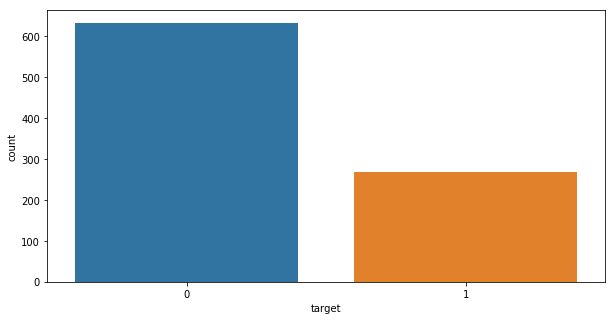

In [6]:
data['target'].replace([1,2], [0,1], inplace=True)

plt.figure(figsize = (10,5))
sns.countplot(x='target', data = data)
print(data['target'].value_counts())

## Ingeniería de variables

En este sección sólo haremos un pequeño cambio y es recodificar las varibles categoricas para no tener problemas con los fúturos modelos que utilizaremos 

In [7]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()
categorical_cols

['est_cuenta',
 'hist_credit',
 'proposito',
 'ahorros',
 'tiempo_empleo',
 'estatus_sexo',
 'deudas_garantes',
 'propiedades',
 'pagos_pend',
 'Tipo_hogar',
 'tipo_trabajo',
 'telefono',
 'trab_extranjero']

In [8]:
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))

data.head()

,est_cuenta,duracion,hist_credit,proposito,monto_credito,ahorros,tiempo_empleo,tasa_renta,estatus_sexo,deudas_garantes,...,propiedades,edad,pagos_pend,Tipo_hogar,Num_credit,tipo_trabajo,num_cargas,telefono,trab_extranjero,target
0,1,30,4,0,4249,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,1
1,3,36,2,4,3835,4,4,2,1,0,...,0,45,2,1,1,1,1,1,0,0
2,1,12,4,1,1804,1,1,3,2,0,...,1,44,2,1,1,2,1,0,0,0
3,2,12,1,9,609,0,1,4,1,0,...,0,26,2,1,1,0,1,0,0,1
4,1,21,2,9,2767,1,4,4,0,0,...,2,61,0,0,2,1,1,0,0,1


### Correlación entre variables


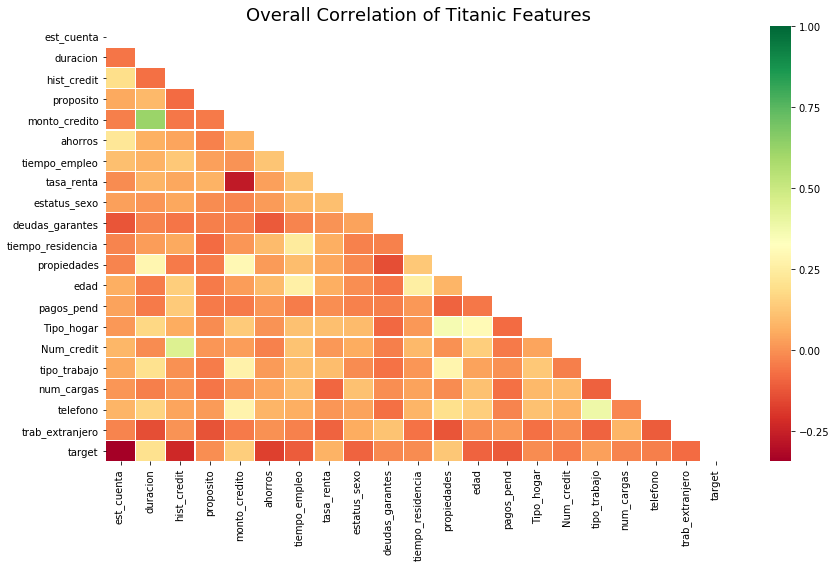

In [9]:
# inicializamos correlación
corr = data.corr()
# Configuramos Mascara
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Tamaño figura
plt.figure(figsize=(14, 8))
# Titulo
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

# Machine Learning 

Para elegir el mejor algoritmo de machine learning echaremos a competir los siguientes modelos: 

- Random Forest
- KNN
- Logistic Regression
- XGB
- Gradient Boosting
- SVC
- Extra Trees
- AdaBoost
- GaussianNB
- Gaussian Process
- Bagging

En cuatro Rount:

(La métrica utilizada para comparar los modelos será el índice Kappa (dado que las clases no están balanceadas))

- 1) Entrenamiento con todas la variables y sólo con los modelos inicializados (se comparan en entrenamiento)
- 2) Entrenamiento de modelos inicializados pero con selección de variables 
- 3) Entrenamiento cambiando los Hiperparámetros de los modelos 
- 4) Comparación en test 


### Muestras de entrenamiento y prueba

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(data.drop('target', axis=1), data['target'],  test_size=0.3, random_state=40)


In [91]:
y_test.value_counts()

0    187
1     83
Name: target, dtype: int64

### Random under-sampling

Aqui realizamos un balancea hacia arriba para la muetra de entrenamienta rellenando aleatoriamente con observaciones sacadas de la data de entrenamiento. 

In [11]:
X = pd.concat([X_train, y_train], axis=1)

Buenos = X[X.target==0]
Malos = X[X.target==1]

Malos_upsampled = resample(Malos,
                          replace=True,
                          n_samples=len(Buenos),
                          random_state=27) 


upsampled = pd.concat([Buenos, Malos_upsampled])
print(upsampled.target.value_counts())

y_train = upsampled.target
X_train = upsampled.drop('target', axis=1)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

1    445
0    445
Name: target, dtype: int64


## Round 1: Modelos inicializados

Se inicializan los modelos y se ajustas  (Se dejan los hiperparametros que vienen por defecto en cada función)

In [12]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(random_state=1, probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []
scorer = make_scorer(cohen_kappa_score)

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train_scaler, y_train)
    KPP = cross_val_score(mod, X_train_scaler, y_train, scoring = scorer, cv = 10)
    scores.append(KPP.mean())

Se crea un data frame para vizualizar los modelos que tuvieron mayor desempeño en entrenamiento, para esto se utilizó el indice Kappa

In [13]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'KPP': scores})

result_df = results.sort_values(by='KPP', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,KPP
0,Extra Trees,0.822475
1,Random Forest,0.775556
2,Bagging Classifier,0.752929
3,Gaussian Process,0.732727
4,Gradient Boosting,0.710556
5,XGBoost,0.636010
6,SVC,0.620354
7,K Nearest Neighbour,0.528030
8,AdaBoost,0.503636
9,Logistic Regression,0.393384


## Rount 2:  Seleccion de variables

Utilizaremos las variables con un promedio de importancia mayor o igual 0.03

In [14]:
# Getting feature importances for the 5 models where we can
ada_imp = pd.DataFrame({'Feature':data.drop('target', axis=1).columns, 'ada importance':ada.feature_importances_})
gbc_imp = pd.DataFrame({'Feature':data.drop('target', axis=1).columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':data.drop('target', axis=1).columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':data.drop('target', axis=1).columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':data.drop('target', axis=1).columns, 'ext importance':ext.feature_importances_})



# Merging results into a single dataframe
importancia = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# Calculating average importance per feature
importancia['Average'] = importancia.mean(axis=1)

# Ranking top to bottom
importancia = importancia.sort_values(by='Average', ascending=False).reset_index(drop=True)

Variables_importantes = importancia['Feature'].head(12).values
importancia

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,monto_credito,0.171889,0.045254,0.117326,0.063839,0.40,0.159662
1,est_cuenta,0.213145,0.175379,0.148778,0.133530,0.02,0.138166
2,edad,0.117436,0.048363,0.107746,0.065291,0.16,0.099767
3,duracion,0.104457,0.054113,0.099341,0.069750,0.06,0.077532
4,proposito,0.057345,0.044966,0.064830,0.059902,0.08,0.061409
5,tiempo_empleo,0.069891,0.046632,0.059478,0.064617,0.02,0.052124
6,hist_credit,0.048888,0.051971,0.043876,0.063763,0.04,0.049699
7,ahorros,0.041671,0.051501,0.046708,0.055944,0.04,0.047165
8,pagos_pend,0.044654,0.063825,0.028479,0.041650,0.02,0.039721
9,propiedades,0.028985,0.048963,0.049981,0.047949,0.02,0.039176


Se eliminan las varibles que no fueron consideradas importantes y se recrea una nueva muestra de entrenamiento y test 

In [15]:
# Re-build model variables
X_train_select = X_train[Variables_importantes]
X_test_select = X_test[Variables_importantes]

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train_select)
X_test_scaler = scaler.transform(X_test_select)


In [16]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(random_state=1, probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()


models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []


# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train_scaler, y_train)
    KPP = cross_val_score(mod, X_train_scaler, y_train, scoring = scorer, cv = 10)
    scores_v2.append(KPP.mean())
    
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original KPP': scores,
    'KPP with feature selection': scores_v2})

result_df = results.sort_values(by='KPP with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)


,Model,Original KPP,KPP with feature selection
0,Extra Trees,0.822475,0.854192
1,Random Forest,0.775556,0.797727
2,Bagging Classifier,0.752929,0.786515
3,Gaussian Process,0.732727,0.735152
4,Gradient Boosting,0.710556,0.726566
5,XGBoost,0.636010,0.683333
6,SVC,0.620354,0.543990
7,AdaBoost,0.503636,0.494596
8,K Nearest Neighbour,0.528030,0.463283
9,Logistic Regression,0.393384,0.420556


En general mejoraron los modelos en entrenamiento con la selección de variables, seguiremos con esta selección pero ahora se trabajará con los hiperparametros 

### Round 3: Model (hyper-parameter) tuning

### XGBoost

In [17]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd.fit(X_train_scaler, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.6min finished


0.797752808988764
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


#### Paso 2

In [18]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.05, n_estimators=1000), param_grid = hyperparams, 
                verbose=True, cv=5, scoring =scorer)

gd.fit(X_train_scaler, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  4.7min finished


0.8089887640449438
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.05,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


#### Paso 3

In [19]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.05, n_estimators=1000, max_depth=7, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

gd.fit(X_train_scaler, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   32.1s finished


0.8089887640449438
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.0,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


#### Paso 4

In [20]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.05, n_estimators=1000, max_depth=7, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

gd.fit(X_train_scaler, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  8.3min finished


0.8089887640449438
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


#### Paso 5

### Gradient Boosting

In [21]:
# Parameter's to search
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

# Setting up parameter grid
hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

# Run GridSearch CV
gd_gbc=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_gbc.fit(X_train_scaler, y_train)
print(gd_gbc.best_score_)
print(gd_gbc.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8044943820224719
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.5min finished


### AdaBoost	

In [22]:
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Run GridSearch CV
gd_abc=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_abc.fit(X_train_scaler, y_train)
print(gd_abc.best_score_)
print(gd_abc.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   31.1s finished


0.5550561797752809
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=200, random_state=None)


### Logistic Regression

In [23]:
# Parameter's to search
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# Setting up parameter grid
hyperparams = {'penalty': penalty, 'C': C}

# Run GridSearch CV
gd_log=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_log.fit(X_train_scaler, y_train)
print(gd_log.best_score_)
print(gd_log.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.43595505617977526
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


### SVC

In [24]:
# Parameter's to search
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# Setting up parameter grid
hyperparams = {'C': Cs, 'gamma' : gammas}

# Run GridSearch CV
gd_svc=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_svc.fit(X_train_scaler, y_train)
print(gd_svc.best_score_)
print(gd_svc.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.8426966292134831
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.7s finished


### Extra Trees

In [25]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd_etc=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_etc.fit(X_train_scaler, y_train)
print(gd_etc.best_score_)
print(gd_etc.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.7910112359550562
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  3.7min finished


### Bagging Classifier

In [26]:
# Parameter's to search
n_estimators = [10, 15, 20, 25, 50, 75, 100, 150]
max_samples = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 50]
max_features = [1, 3, 5, 7]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

# Run GridSearch CV
gd_bac=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_bac.fit(X_train_scaler, y_train)
print(gd_bac.best_score_)
print(gd_bac.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
0.6089887640449438
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=5, max_samples=50,
         n_estimators=150, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 1760 out of 1760 | elapsed:  1.3min finished


### Gaussian Process

In [27]:
# Parameter's to search
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

# Setting up parameter grid
hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

# Run GridSearch CV
gd_gpc=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_gpc.fit(X_train_scaler, y_train)
print(gd_gpc.best_score_)
print(gd_gpc.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.7213483146067415
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=2,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=True)


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   59.4s finished


### K Nearest Neighbour

In [28]:
# Parameter's to search
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# Setting up parameter grid
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

# Run GridSearch CV
gd_knn=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_knn.fit(X_train_scaler, y_train)
print(gd_knn.best_score_)
print(gd_knn.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
0.7460674157303371
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.4min finished


### Random Forest

In [29]:
# Parameter's to search
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

# Setting up parameter grid
hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Run GridSearch CV
gd_rf=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = scorer)

# Fitting model and return results
gd_rf.fit(X_train_scaler, y_train)
print(gd_rf.best_score_)
print(gd_rf.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.7820224719101123
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  4.3min finished


### Re Entrenamiento con hiperparametros 

In [38]:
xgb = XGBClassifier(learning_rate=0.05, n_estimators=1000, max_depth=7, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bylevel=1)

ran = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

gpc = GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=2,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=True)

bag = BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=5, max_samples=50,
         n_estimators=150, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

ext = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=200, random_state=None)

gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

gnb = GaussianNB()


models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []


for mod in models:
    mod.fit(X_train_scaler, y_train)
    KPP = cross_val_score(mod, X_train_scaler, y_train, scoring = scorer, cv = 10)
    scores_v3.append(KPP.mean())

results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original KPP': scores,
    'KPP with feature selection': scores_v2,
    'KPP with tuned parameters': scores_v3})

result_df = results.sort_values(by='KPP with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original KPP,KPP with feature selection,KPP with tuned parameters
0,SVC,0.620354,0.543990,0.867374
1,Gradient Boosting,0.710556,0.726566,0.811414
2,XGBoost,0.636010,0.683333,0.798030
3,Extra Trees,0.822475,0.854192,0.788939
4,Random Forest,0.775556,0.797727,0.764343
5,K Nearest Neighbour,0.528030,0.463283,0.750556
6,Gaussian Process,0.732727,0.735152,0.735152
7,AdaBoost,0.503636,0.494596,0.575758
8,Bagging Classifier,0.752929,0.786515,0.561970
9,Logistic Regression,0.393384,0.420556,0.420556


### Inicializando los mejores modelos entre 'Original KPP', 'KPP with feature selection' y KPP with tuned parameters

In [39]:
svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

xgb = XGBClassifier(learning_rate=0.05, n_estimators=1000, max_depth=7, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bylevel=1)

ext = ExtraTreesClassifier()

ran = RandomForestClassifier(random_state=1)

gpc = GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=2,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=True)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=200, random_state=None)

bag = BaggingClassifier()

log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

gnb = GaussianNB()

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []


for mod in models:
    mod.fit(X_train_scaler, y_train)


### Clasificación por votación Ensemble Vote Classifier 

In [33]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train_scaler, y_train, cv = 10, scoring= scorer)
grid_soft.fit(X_train_scaler, y_train)

print("Soft voting on train set score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

Soft voting on train set score mean: 100.00
Soft voting on test set score mean: 81.37


## Comparación en test 

Estudiaremos los modelos 4 modelos que obtuvieron mayor indice Kappa en en los round 1, 2 y 3.

#### Extra tree

Accuracy: 0.7296296296296296
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       187
           1       0.66      0.25      0.37        83

   micro avg       0.73      0.73      0.73       270
   macro avg       0.70      0.60      0.60       270
weighted avg       0.71      0.73      0.69       270



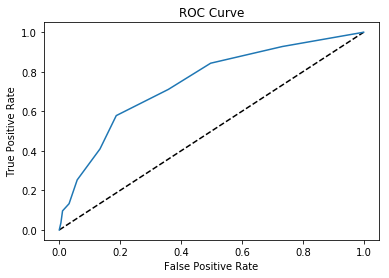

AUC: 0.7437020810514787
Kappa: 0.23420623203046087


array([[176,  11],
       [ 62,  21]], dtype=int64)

In [42]:
y_pred = ext.predict(X_test_scaler)  # Predict the labels of the test set: y_pred

# Compute and print metrics
print("Accuracy: {}".format(ext.score(X_test_scaler, y_test)))
print(classification_report(y_test, y_pred))


y_pred_prob = ext.predict_proba(X_test_scaler)[:,1]

fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)  # Generate ROC curve values: fpr, tpr, thresholds

plt.plot([0, 1], [0, 1], 'k--')  # Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
print("Kappa: {}".format(cohen_kappa_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)

#### GradientBoosting

Accuracy: 0.762962962962963
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       187
           1       0.64      0.53      0.58        83

   micro avg       0.76      0.76      0.76       270
   macro avg       0.72      0.70      0.71       270
weighted avg       0.75      0.76      0.76       270



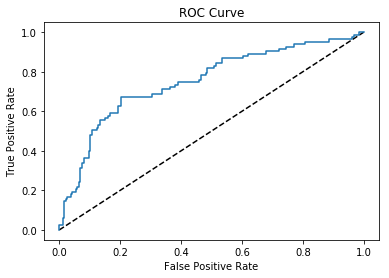

AUC: 0.7513691128148959
Kappa: 0.41593997160819307


array([[162,  25],
       [ 39,  44]], dtype=int64)

In [99]:
y_pred = gbc.predict(X_test_scaler)  # Predict the labels of the test set: y_pred

# Compute and print metrics
print("Accuracy: {}".format(gbc.score(X_test_scaler, y_test)))
print(classification_report(y_test, y_pred))


y_pred_prob = gbc.predict_proba(X_test_scaler)[:,1]

fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)  # Generate ROC curve values: fpr, tpr, thresholds

plt.plot([0, 1], [0, 1], 'k--')  # Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
print("Kappa: {}".format(cohen_kappa_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)

#### SVC

Accuracy: 0.6851851851851852
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       187
           1       0.25      0.01      0.02        83

   micro avg       0.69      0.69      0.69       270
   macro avg       0.47      0.50      0.42       270
weighted avg       0.56      0.69      0.57       270



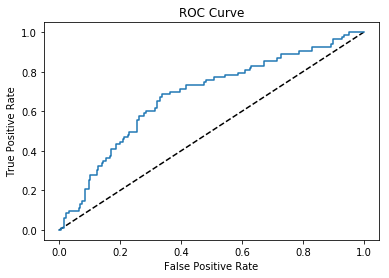

AUC: 0.6785000966432575


array([[184,   3],
       [ 82,   1]], dtype=int64)

In [48]:
y_pred = svc.predict(X_test_scaler)  # Predict the labels of the test set: y_pred

# Compute and print metrics
print("Accuracy: {}".format(svc.score(X_test_scaler, y_test)))
print(classification_report(y_test, y_pred))


y_pred_prob = svc.predict_proba(X_test_scaler)[:,1]

fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)  # Generate ROC curve values: fpr, tpr, thresholds

plt.plot([0, 1], [0, 1], 'k--')  # Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

confusion_matrix(y_test, y_pred)


#### Ensemble Vote Classifier

Accuracy: 0.7518518518518519
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       187
           1       0.64      0.43      0.52        83

   micro avg       0.75      0.75      0.75       270
   macro avg       0.71      0.66      0.68       270
weighted avg       0.74      0.75      0.74       270



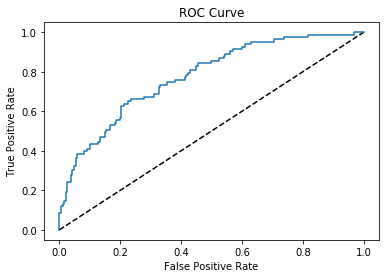

AUC: 0.775980929063849
Kappa: 0.35928313381029964


array([[167,  20],
       [ 47,  36]], dtype=int64)

In [253]:
y_pred = grid_soft.predict(X_test_scaler)  # Predict the labels of the test set: y_pred

# Compute and print metrics
print("Accuracy: {}".format(grid_soft.score(X_test_scaler, y_test)))
print(classification_report(y_test, y_pred))


y_pred_prob = grid_soft.predict_proba(X_test_scaler)[:,1]

fpr, tpr,thresholds = roc_curve(y_test, y_pred_prob)  # Generate ROC curve values: fpr, tpr, thresholds

plt.plot([0, 1], [0, 1], 'k--')  # Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
print("Kappa: {}".format(cohen_kappa_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)

Para el paso final nos quedaremos con Grid soft y GradientBoosting por tener mejor prodicción en los malos clientes

## Consideraciones entregadas por el negocio

- Es 5 veces peor clasificar un cliente como bueno cuando es malo, que malo cuando es bueno

En la muetra de test tenemos 187 buenos y 83 malos, si clasificaramos a todos los clientes como buenos tendríamos un costo de 83*5=415, si por el contrario clasificamos a todos como malos el costo sería 187*1 = 187. Tenemos que encontrar el mejor punto de corte para minimizar los costos (penalización).

Para cada punto de corte calculamos la matriz de confusión y el costo asociado a esta multiplicando por 1 si es un falso positivo y por 5 si es un falso negativo. 


### Grid soft

In [276]:
def my_scorer(y_test, y_est, cost_fp=1, cost_fn=5.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

scores = grid_soft.predict_proba(X_test_scaler)[:,1]

DataFrame = pd.DataFrame({'Target':y_test, 'score':scores})
costos= []
score_1 = []


for i in scores:
    
    DataFrame['pred'] = DataFrame['score']>i

    #DataFrame['pred'].replace([True, False], [1,0], inplace=True)

    costo = my_scorer(DataFrame['Target'],DataFrame['pred'] )
    costos.append(costo)
    score_1.append(i)
    
data_costos = pd.DataFrame({'costos':costos,'score':score_1})
print(data_costos[data_costos['costos']==data_costos['costos'].min()])
    
scores = grid_soft.predict_proba(X_test_scaler)[:,1]
predic = []

for sc in scores:
    if(sc>0.188308):
        predic.append(1)
    else:
        predic.append(0)

    
confusion_matrix(y_test, predic)



    costos     score
39   138.0  0.188308


array([[ 68, 119],
       [  4,  79]], dtype=int64)

### Gradient Boosting

In [277]:
def my_scorer(y_test, y_est, cost_fp=1, cost_fn=5.0):
    tn, fp, fn, tp = confusion_matrix(y_test, y_est).ravel()
    return cost_fp*fp + cost_fn*fn

scores = gbc.predict_proba(X_test_scaler)[:,1]

DataFrame_gbc = pd.DataFrame({'Target':y_test, 'score':scores})
costos= []
score_1 = []


for i in scores:
    
    DataFrame_gbc['pred'] = DataFrame_gbc['score']>i
    costo = my_scorer(DataFrame_gbc['Target'],DataFrame_gbc['pred'] )
    costos.append(costo)
    score_1.append(i)
    
data_costos = pd.DataFrame({'costos':costos,'score':score_1})
print(data_costos[data_costos['costos']==data_costos['costos'].min()])
    
scores = gbc.predict_proba(X_test_scaler)[:,1]
predic_gbc = []

for sc in scores:
    if(sc>0.188308):
        predic_gbc.append(1)
    else:
        predic_gbc.append(0)

    
confusion_matrix(y_test, predic_gbc)


    costos     score
47   155.0  0.099068


array([[109,  78],
       [ 21,  62]], dtype=int64)

## Estimacin Final

Calcularemos el Precio base del seguro para los clientes que fueron clasificados como buenos despues de aplicar el costo

#### Con Ensemble Vote Classifier

In [281]:
DataFrame['buenos']= predic
Data_buenos = DataFrame[DataFrame['buenos']==1]

UF = 27765.23
p = Data_buenos['score']*0.1
PrecioBPP=(3*(1+0.03+p))*UF
print(PrecioBPP.sum())

DataFrame['Precio'] = PrecioBPP


17691924.602503356


#### Con Gradient Boosting

In [285]:
DataFrame_gbc['buenos']= predic_gbc
Data_buenos_gbc = DataFrame_gbc[DataFrame_gbc['buenos']==1]

UF = 27765.23
p = Data_buenos_gbc['score']*0.1
PrecioBPP_gbc=(3*(1+0.03+p))*UF
print(PrecioBPP_gbc.sum())

Data_buenos_gbc['Precio'] = PrecioBPP_gbc

12658320.437745757


In [283]:
DataFrame.head()

,Target,score,pred,buenos,Precio
537,1,0.600642,False,1,90797.653662
662,0,0.318220,False,1,88445.200195
853,0,0.307769,False,1,88358.140840
787,1,0.269985,False,1,88043.415939
538,0,0.307249,False,1,88353.810223


In [286]:
Data_buenos_gbc.head()

,Target,score,pred,buenos,Precio
537,1,0.936765,True,1,93597.407405
787,1,0.597989,False,1,90775.554099
538,0,0.243892,False,1,87826.074246
739,1,0.859609,True,1,92954.733724
26,1,0.515020,False,1,90084.458146
